# Verification 
Check that the MIS script produces valid results

In [1]:
# Imports
import datetime
from IPython.display import clear_output
import itertools
import json
import subprocess
import warnings

import matplotlib.pyplot as plt
import networkx as nx

After imports, we generate a network on which to operate. This network is written as an edgelist (the only format that MIS currently takes). Reading the edgelist back in to re-make `g` converts the node identifiers from `int` to `str`.

/Users/james/IdeaProjects/maximal_independent_set/.venv/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


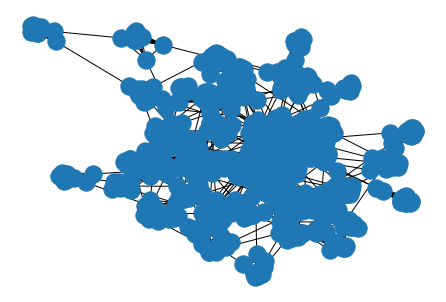

In [2]:
# Generate a network
infile = "examples.txt"
g = nx.generators.community.gaussian_random_partition_graph(
    1000,
    20,
    5,
    0.7,
    0.0002
)
nx.write_edgelist(g, infile)
g = nx.read_edgelist(infile)
with warnings.catch_warnings():
    nx.draw(g)
plt.show()

In [3]:
# This function uses a given i
def run(infile, side="max"):
    command = ["./target/release/mis",
        "-g", f"{infile}",
        "-n", "100000",
        "-t", "4",
        ]
    if side == "min":
        command += ["-s"]
    elif side == "max":
        pass
    else:
        raise Exception("Value for side must be 'max' or 'min'")
    
    result = json.loads(subprocess.check_output(command))
    return result
    

In [4]:
def verify(result):
    neighbors = {}
    for i in result["members"]:
        neighbors[i] = set(g.neighbors(i))
    
    # Check that no node in the result is a neighbor of an  existing node.
    for i,j in itertools.combinations(result["members"], 2):
        assert(i not in neighbors[j])
        assert(j not in neighbors[i])
    
    # Check that all nodes are either (1) in the result or (2) a neighbor.
    complete = set()
    for i, v in neighbors.items():
        complete.add(i)
        complete.update(v)
        
    assert(not complete.difference(g.nodes()))
    

In [5]:
smallest_best = {"size":999999, "members": []}
largest_best = {"size":0, "members": []}

counter = 0
t0 = datetime.datetime.now()

for _ in range(1):
    # Large
    result = run(infile)
    verify(result)
    # If the result size is larger, update.
    if result['size'] > largest_best["size"]:
        largest_best = result

    # Small
    result = run(infile, side="min")
    verify(result)
    # If the result size is smaller, update.
    if result['size'] < smallest_best["size"]:
        smallest_best = result
    
    counter += 100_000
    
    clear_output(wait=True)
    print(f"{datetime.datetime.now() - t0}: Counter @ {counter:,}")
    print()
    print(smallest_best)
    print()
    print(largest_best)

0:00:21.048467: Counter @ 100,000

{'size': 81, 'members': ['985', '670', '123', '100', '893', '289', '20', '147', '942', '311', '340', '973', '350', '244', '855', '891', '577', '109', '741', '755', '639', '144', '305', '489', '186', '170', '650', '717', '429', '435', '870', '89', '63', '913', '280', '351', '764', '784', '580', '462', '951', '804', '197', '299', '227', '562', '465', '45', '769', '599', '823', '701', '421', '25', '367', '335', '526', '554', '72', '392', '612', '676', '71', '986', '916', '697', '505', '253', '509', '178', '233', '805', '836', '324', '849', '984', '385', '408', '11', '958', '738']}

{'size': 110, 'members': ['443', '665', '182', '387', '291', '954', '795', '719', '437', '486', '228', '585', '5', '279', '818', '754', '987', '925', '516', '421', '274', '605', '675', '134', '298', '949', '732', '804', '689', '697', '123', '162', '31', '247', '17', '390', '513', '340', '174', '771', '104', '80', '261', '900', '55', '551', '329', '616', '625', '723', '352', '5